In [1]:
from functies import *
from classes import *
import sympy as sp
import numpy as np

In [2]:
def snelheidsmodel_pseudosnelheid(t, parameters):
    c_0, k, orde = parameters
    '''
    c_0 = beginconcentratie
    k = pseudosnelheidsconstante
    orde = orde van de reactie
    '''
    if c_0 < 0 or k < 0:
        return np.full(np.shape(t), np.inf)
    if orde == 1:
        c = c_0 * np.exp(-k*t)
    else:
        c = (c_0**(1-orde) - k*(1-orde)*t)**(1/(1-orde))
    return c

def snelheidsmodel_1eorde(t,parameters):
    c_0, k = parameters
    return c_0 * np.exp(-k*t)

def snelheidsmodel_0eorde(t,params):
    c_0, k = params
    return c_0 - k*t

def snelheidsmodel_2eorde(t,params):
    c_0, k = params
    return 1/(1/c_0 + k*t)

def snelheidsmodel_2eorde_linearised(t,params):
    return 1/snelheidsmodel_2eorde(t,params)

def snelheidsmodel_1eorde_linearised(t,params):
    return np.log(snelheidsmodel_1eorde(t,params))


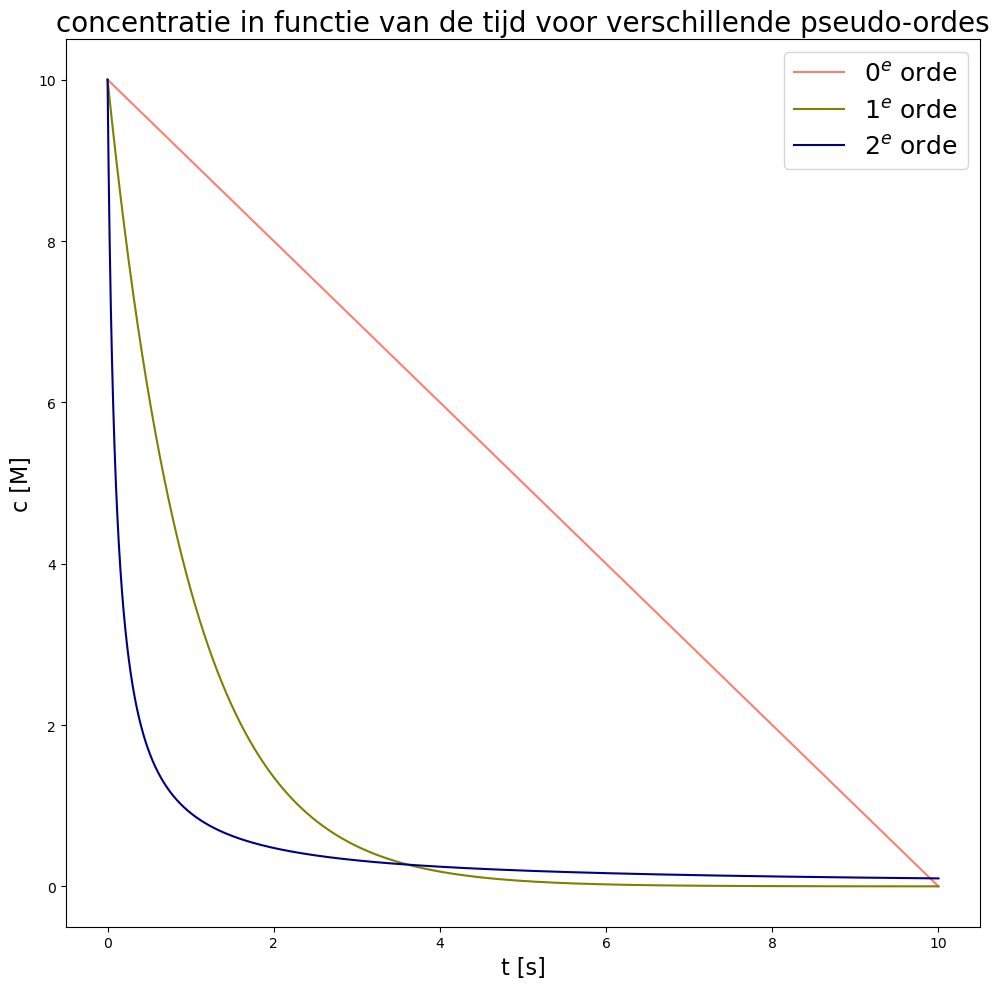

In [3]:
###plot van de concentratie in functie van de tijd (voor de voorbereidingsopgave)
fig, ax = plt.subplots(1,1,figsize = (10,10))
tijd = np.linspace(0,10,10000)
ax.plot(tijd, snelheidsmodel_0eorde(tijd,[10,1]), color = 'salmon',label = '$0^e$ orde')
ax.plot(tijd, snelheidsmodel_1eorde(tijd,[10,1]), color = 'olive', label = '$1^e$ orde')
ax.plot(tijd, snelheidsmodel_2eorde(tijd,[10,1]), color = 'navy', label = '$2^e$ orde')
ax.set_xlabel('t [s]',fontsize = 16)
ax.set_ylabel('c [M]',fontsize = 16)
ax.legend(fontsize = 18)
ax.set_title('concentratie in functie van de tijd voor verschillende pseudo-ordes',fontsize = 20)
plt.tight_layout();plt.savefig('voorbereiding_reactieordes.png');plt.show()

In [4]:
#prepareer de data van de eerste set metingen
"""
absorbanties_set_1 = []
tijd_0 = (10,56)
tijden_set_1 = []
for i in range(36): #alle meetpunten afgaan --let op! het is 0.06, niet 0.006!
    adres = "C:/Users/User/Documents/Cas/Unif/2e can/experimentele/week 12 chemie I/NaOH0.006/NaOH0.006_Absorbance__"+str(i)+'__'+str(i)+'.txt'
    file = open(adres, 'rt')
    tekst = file.read();file.close()
    tekst = tekst.split('590,095	')
    meting = float(tekst[1][:8].replace(',','.'))
    absorbanties_set_1.append(meting)
    
    datum = tekst[0].split('Mon Dec 09 11:')[1][:5]
    minuut = int(datum[:2]);seconde = int(datum[3:])

    tijdsverschil = (minuut-tijd_0[0])*60 + (seconde-tijd_0[1])
    tijden_set_1.append(tijdsverschil)

absorbanties_set_1 = np.array(absorbanties_set_1)
tijden_set_1 = np.array(tijden_set_1)
print(np.shape(absorbanties_set_1))
print(np.shape(tijden_set_1))
"""
epsilon = 87000 #M^-1 cm^-1
l = 1 #cm

#concentraties_set_1 = absorbanties_set_1/(epsilon*l)

#de data van de Bulgaar/Indiër

data_1=np.array([0.6777,0.61495,0.55706,0.50277,0.45396,0.4072,0.36515,0.32651,0.2922,0.26294,0.23723,0.21136,0.18762,0.16799,0.14923,0.13225,0.11662,0.10335])
data_2=np.array([0.75223,0.71715,0.68048,0.6455,0.61031,0.57533,0.54337,0.51178,0.48297,0.45412,0.4277,0.40186,0.37751,0.3522,0.32759,0.30677,0.28685,0.26855,0.25045])
concentraties_set_1 = data_1/(epsilon*l)
tijden_set_1 = np.array([20*i for i in range(len(data_1))])

fouten_set_1 = 0.02*concentraties_set_1


Raw output
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 10973.009923000785
             x: [ 2.023e-06  3.098e-08  1.140e+00]
           nit: 49
          nfev: 96
 final_simplex: (array([[ 2.023e-06,  3.098e-08,  1.140e+00],
                       [ 2.024e-06,  3.098e-08,  1.140e+00],
                       [ 2.023e-06,  3.098e-08,  1.140e+00],
                       [ 2.024e-06,  3.097e-08,  1.140e+00]]), array([ 1.097e+04,  1.097e+04,  1.097e+04,  1.097e+04]))
[[2.002984030265976e-06, 2.0440637234258143e-06], [1.5487543468581236e-08, 4.646263040574371e-08], [2.9386376754401624, 2.2634721664488624]]
c_0 heeft als waarde: 2.0235e-06 + 2.06e-08 - 2.0479e-08 met 68% betrouwbaarheidsinterval: [2.003e-06, 2.0441e-06] 
k heeft als waarde: 3.0975e-08 + 1.5488e-08 - 1.5488e-08 met 68% betrouwbaarheidsinterval: [1.5488e-08, 4.6463e-08] 
orde heeft als waarde: 1.1403 + 1.1231 - -1.7983 met 68% betrouwbaarheidsinterval: [2.9386, 2.

C:\Users\samfa\AppData\Local\Temp\ipykernel_18800\2029746687.py:13: RuntimeWarning: overflow encountered in scalar power
  c = (c_0**(1-orde) - k*(1-orde)*t)**(1/(1-orde))
c:\Users\samfa\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


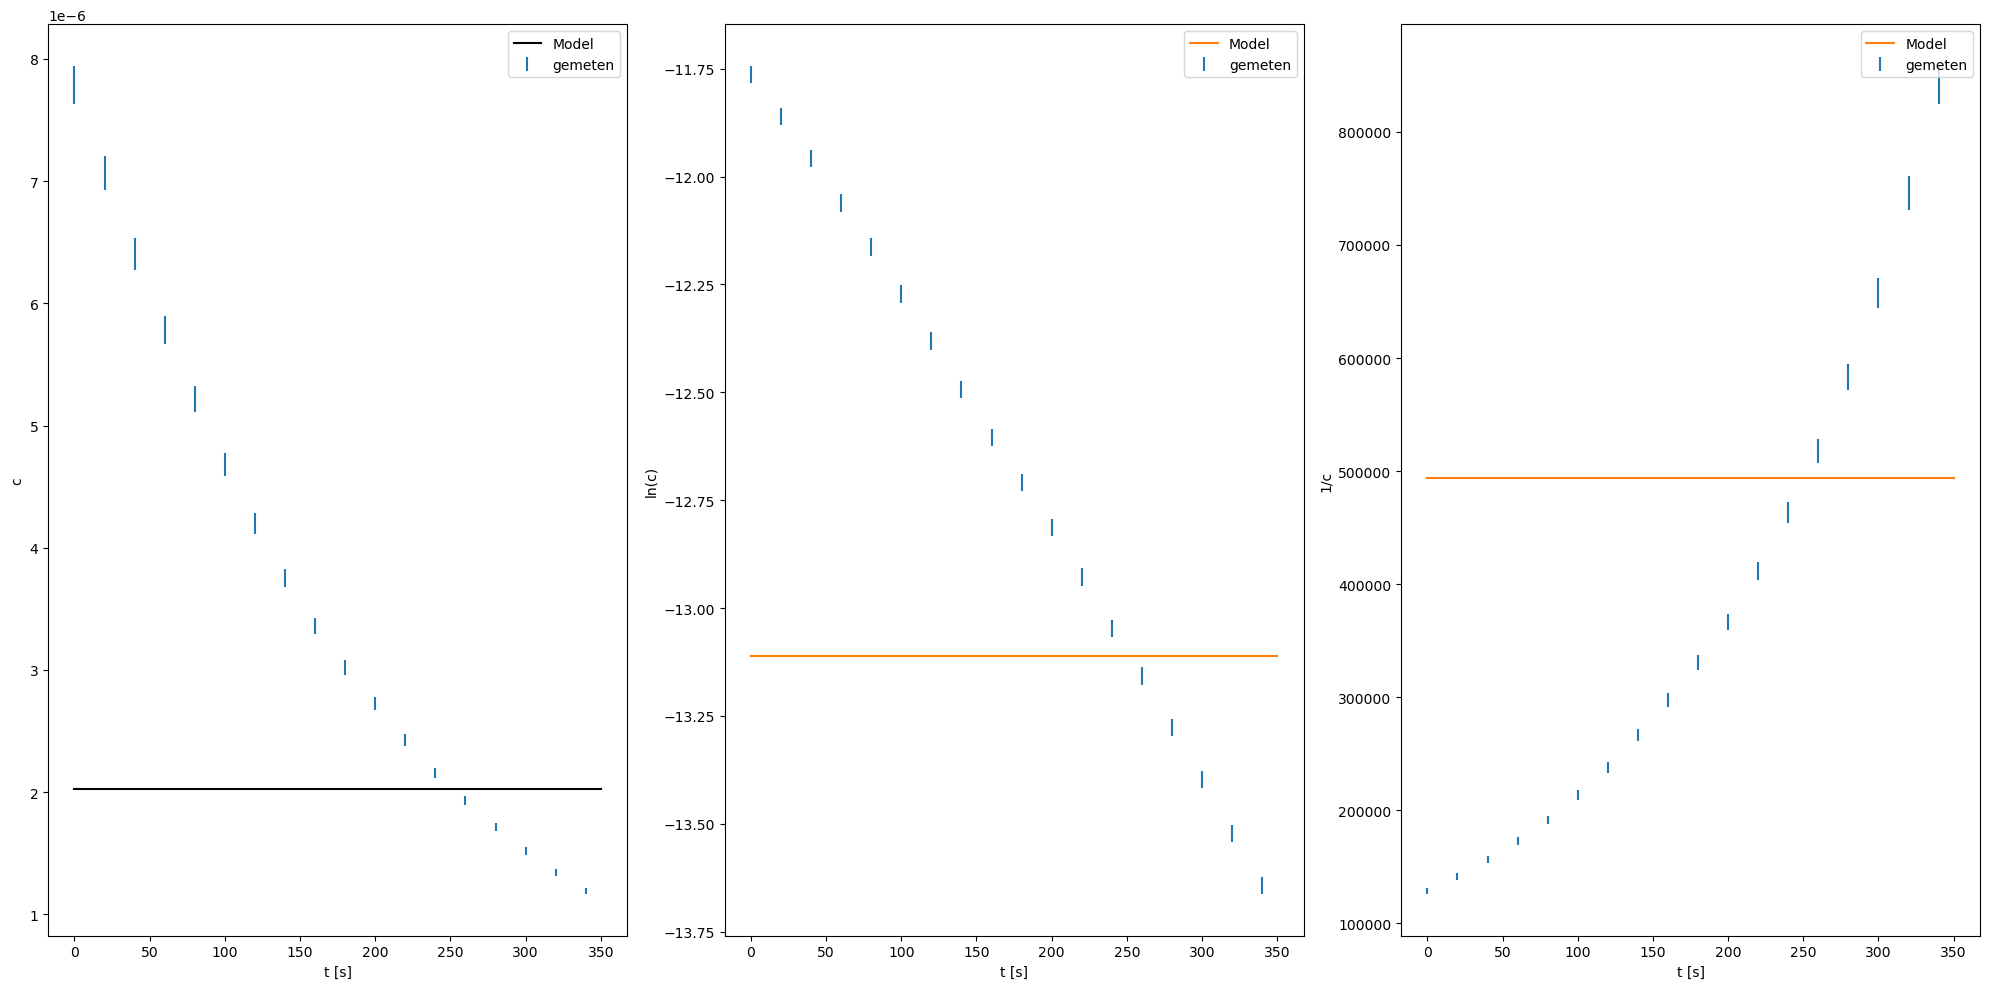

In [5]:
# eerste set metingen: we gokken de orde
def initial_vals(x,y):
    return [0.96e-5,2.1e-8, 1]

parameters = ['c_0', 'k', 'orde']
outp = fit(parameters, snelheidsmodel_pseudosnelheid, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1)
print(outp)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]


fig,ax = plt.subplots(1,3, figsize = (20,10))
ax[0].errorbar(tijden_set_1,concentraties_set_1,linestyle = '', label = 'gemeten', yerr = fouten_set_1)
ax[1].errorbar(tijden_set_1,np.log(concentraties_set_1), linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1)
ax[2].errorbar(tijden_set_1,1/concentraties_set_1, linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1**2)
ax[0].set_ylabel('c')
ax[1].set_ylabel('ln(c)')
ax[2].set_ylabel('1/c')
t = np.linspace(0,350)
ax[0].plot(t, snelheidsmodel_pseudosnelheid(t, parameterwaarden),color = 'black',label = 'Model')
ax[1].plot(t, np.log(snelheidsmodel_pseudosnelheid(t, parameterwaarden)),label = 'Model')
ax[2].plot(t, 1/snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')
for i in range(3):
    ax[i].set_xlabel('t [s]')
    ax[i].legend()
plt.tight_layout();plt.show()

Raw output
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 650.3261857416969
             x: [ 6.004e-06  1.485e-08]
           nit: 40
          nfev: 79
 final_simplex: (array([[ 6.004e-06,  1.485e-08],
                       [ 6.003e-06,  1.485e-08],
                       [ 6.003e-06,  1.485e-08]]), array([ 6.503e+02,  6.503e+02,  6.503e+02]))
[[5.987000420468397e-06, 6.020120285587257e-06], [1.4791576660276891e-08, 1.491058014190215e-08]]
c_0 heeft als waarde: 6.0036e-06 + 1.6499e-08 - 1.6621e-08 met 68% betrouwbaarheidsinterval: [5.987e-06, 6.0201e-06] 
k heeft als waarde: 1.4851e-08 + 5.9723e-11 - 5.9281e-11 met 68% betrouwbaarheidsinterval: [1.4792e-08, 1.4911e-08] 


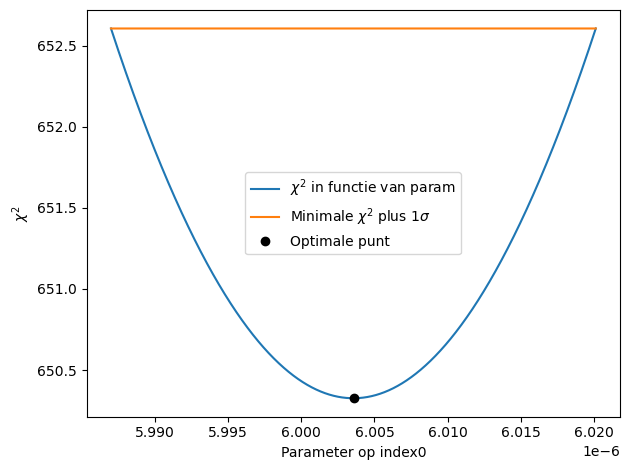

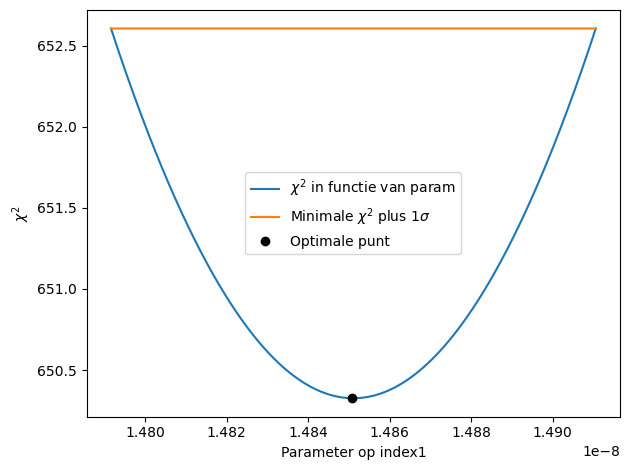

De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 4.7333e-128
De gereduceerde chi^2 waarde is: 40.645
[[6.003621326743891e-06, 1.6620906275493446e-08, 'S'], [1.4850857475627285e-08, 5.972266627486654e-11, 'S']]


$(600.4 \pm 1.7)\cdot 10^{-8}$


$(1485.1 \pm 6.0)\cdot 10^{-11}$


"\nfig,ax = plt.subplots(1,1, figsize = (10,10))\nax.errorbar(tijden_set_1,concentraties_set_1,linestyle = '', label = 'gemeten', yerr = fouten_set_1, color = 'black', marker = 'o')\nax.set_ylabel('c',fontsize = 15)\nt = np.linspace(0,350)\nax.plot(t, snelheidsmodel_0eorde(t, parameterwaarden),linestyle = '--',label = 'Model')\nax.set_title('plot dataset 1 met model van 0e orde',fontsize = 20)\nax.set_xlabel('t [s]',fontsize = 15)\nax.legend(fontsize = 18)\nplt.tight_layout();plt.savefig('dataset_1_fit_0e_orde.png');plt.show()"

In [6]:
#we zien duidelijk dat het geen 2e orde is dus dat gooien we al weg
# eerste set metingen 0e orde
def initial_vals(x,y):
    return [0.96e-5,2.1e-8]


#help(plot_fit(x_val, y_val, x_variance, y_variance, x_as_titel, y_as_titel, titel, model, parameter_vals, chi_2, p, save_name = None, size = None, savefig = False,fontsize = 5, titlesize = None, axsize = None):)

parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_0eorde, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1, detailed_logs=True)
print(outp)
for met in outp:
    print('\n')
    latex_print_meting(met)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]


"""
fig,ax = plt.subplots(1,1, figsize = (10,10))
ax.errorbar(tijden_set_1,concentraties_set_1,linestyle = '', label = 'gemeten', yerr = fouten_set_1, color = 'black', marker = 'o')
ax.set_ylabel('c',fontsize = 15)
t = np.linspace(0,350)
ax.plot(t, snelheidsmodel_0eorde(t, parameterwaarden),linestyle = '--',label = 'Model')
ax.set_title('plot dataset 1 met model van 0e orde',fontsize = 20)
ax.set_xlabel('t [s]',fontsize = 15)
ax.legend(fontsize = 18)
plt.tight_layout();plt.savefig('dataset_1_fit_0e_orde.png');plt.show()"""


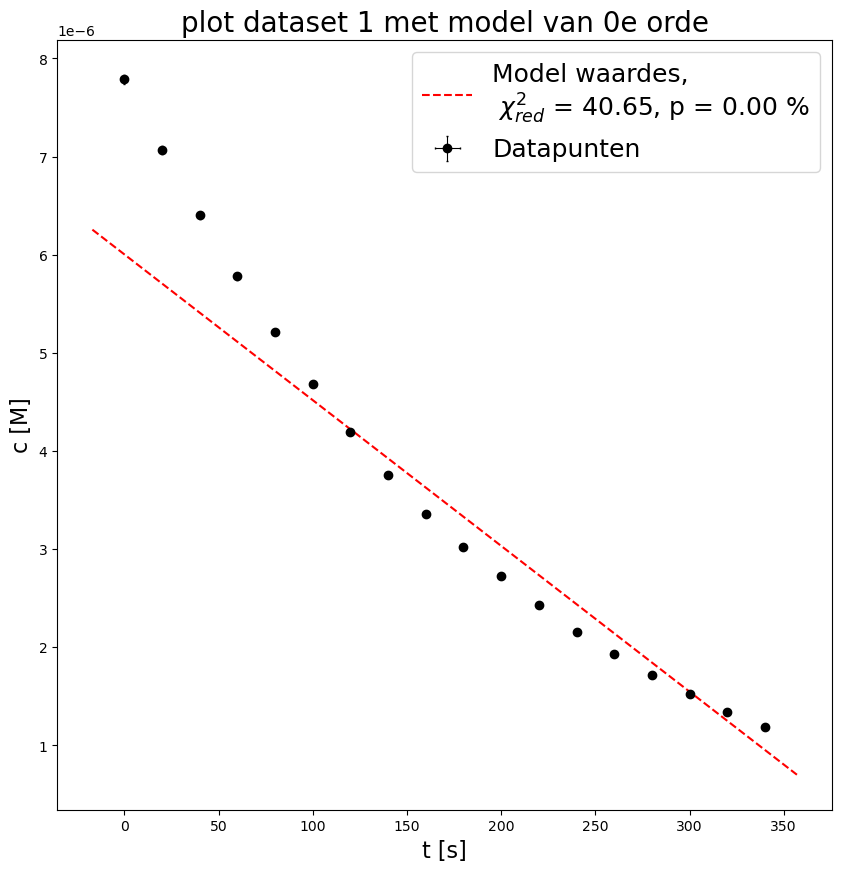

In [7]:
#plotten jeej
plot_fit(tijden_set_1, concentraties_set_1, np.full(np.shape(tijden_set_1),0), fouten_set_1**2/12, 't [s]', 'c [M]', 'plot dataset 1 met model van 0e orde', snelheidsmodel_0eorde,
          parameterwaarden, 40.65, 4.7e-28, save_name = 'dataset_1_fit_0e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)


Raw output
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1135.347800795658
             x: [ 9.481e-06  1.566e+03]
           nit: 110
          nfev: 208
 final_simplex: (array([[ 9.481e-06,  1.566e+03],
                       [ 9.481e-06,  1.566e+03],
                       [ 9.481e-06,  1.566e+03]]), array([ 1.135e+03,  1.135e+03,  1.135e+03]))
[[9.33540486261224e-06, 9.628323912991024e-06], [1549.807110985096, 1582.5273197257948]]
c_0 heeft als waarde: 9.4812e-06 + 1.4708e-07 - 1.4584e-07 met 68% betrouwbaarheidsinterval: [9.3354e-06, 9.6283e-06] 
k heeft als waarde: 1566 + 16.489 - 16.231 met 68% betrouwbaarheidsinterval: [1549.8, 1582.5] 


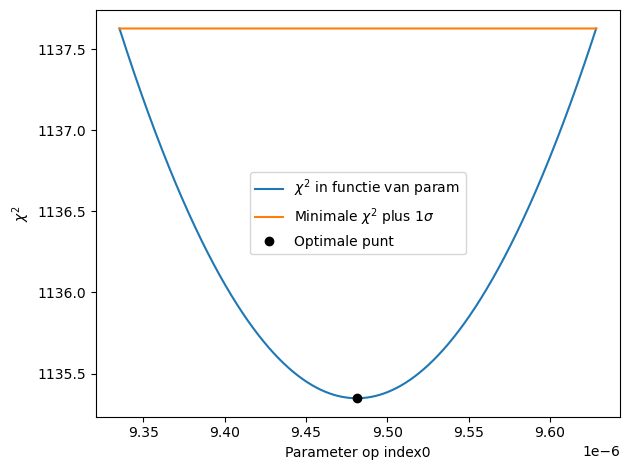

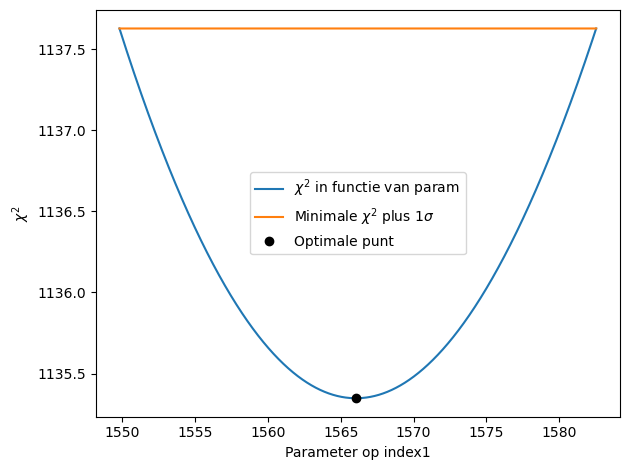

De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 1.1066e-231
De gereduceerde chi^2 waarde is: 70.959
$(94.8 \pm 1.5)\cdot 10^{-7}$
$(1566.0 \pm 16.5)\cdot 10^{0}$


"\nfig,ax = plt.subplots(1,1, figsize = (10,10))\nax.errorbar(tijden_set_1,1/concentraties_set_1,linestyle = '', label = 'gemeten', yerr = fouten_set_1/(concentraties_set_1**2), color = 'black', marker = 'o')\nax.set_ylabel('1/c [M$^{-1}$]',fontsize = 15)\nt = np.linspace(0,350)\nax.plot(t, 1/snelheidsmodel_2eorde(t, parameterwaarden),linestyle = '--',label = 'Model')\nax.set_title('plot dataset 1 met model van 2e orde',fontsize = 20)\nax.set_xlabel('t [s]',fontsize = 15)\nax.legend(fontsize = 18)\nplt.tight_layout();plt.savefig('dataset_1_fit_2e_orde.png');plt.show()"

In [14]:
# eerste set metingen 2e orde
def initial_vals(x,y):
    return [0.96e-5,1]


parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_2eorde, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1, detailed_logs=True)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
for met in outp:
    latex_print_meting(met)
"""
fig,ax = plt.subplots(1,1, figsize = (10,10))
ax.errorbar(tijden_set_1,1/concentraties_set_1,linestyle = '', label = 'gemeten', yerr = fouten_set_1/(concentraties_set_1**2), color = 'black', marker = 'o')
ax.set_ylabel('1/c [M$^{-1}$]',fontsize = 15)
t = np.linspace(0,350)
ax.plot(t, 1/snelheidsmodel_2eorde(t, parameterwaarden),linestyle = '--',label = 'Model')
ax.set_title('plot dataset 1 met model van 2e orde',fontsize = 20)
ax.set_xlabel('t [s]',fontsize = 15)
ax.legend(fontsize = 18)
plt.tight_layout();plt.savefig('dataset_1_fit_2e_orde.png');plt.show()"""

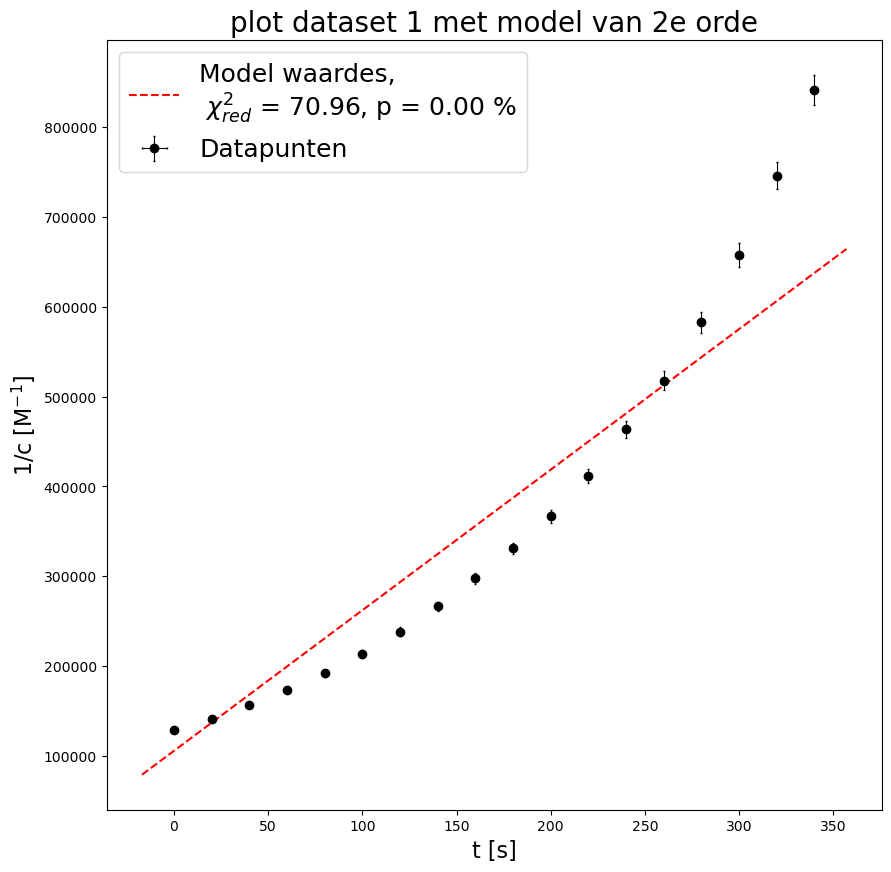

In [15]:
plot_fit(tijden_set_1, 1/concentraties_set_1, np.full(np.shape(tijden_set_1),0), (fouten_set_1/(concentraties_set_1**2))**2, 't [s]', '1/c [M$^{-1}$]', 'plot dataset 1 met model van 2e orde', snelheidsmodel_2eorde_linearised,
          parameterwaarden, 70.96, 1.1e-231, save_name = 'dataset_1_fit_2e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)

Raw output
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 13.034641361461432
             x: [ 8.049e-06  5.528e-03]
           nit: 88
          nfev: 169
 final_simplex: (array([[ 8.049e-06,  5.528e-03],
                       [ 8.049e-06,  5.529e-03],
                       [ 8.048e-06,  5.528e-03]]), array([ 1.303e+01,  1.303e+01,  1.303e+01]))
[[7.991379667903792e-06, 8.10594963390194e-06], [0.005493052934948688, 0.005564098463353956]]
c_0 heeft als waarde: 8.0488e-06 + 5.7185e-08 - 5.7385e-08 met 68% betrouwbaarheidsinterval: [7.9914e-06, 8.1059e-06] 
k heeft als waarde: 0.0055283 + 3.5792e-05 - 3.5253e-05 met 68% betrouwbaarheidsinterval: [0.0054931, 0.0055641] 


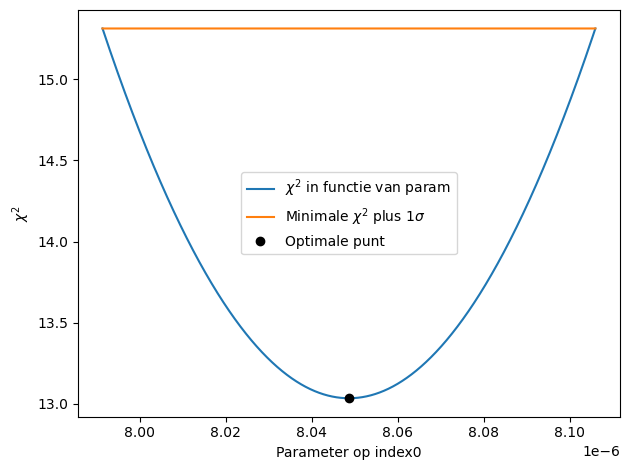

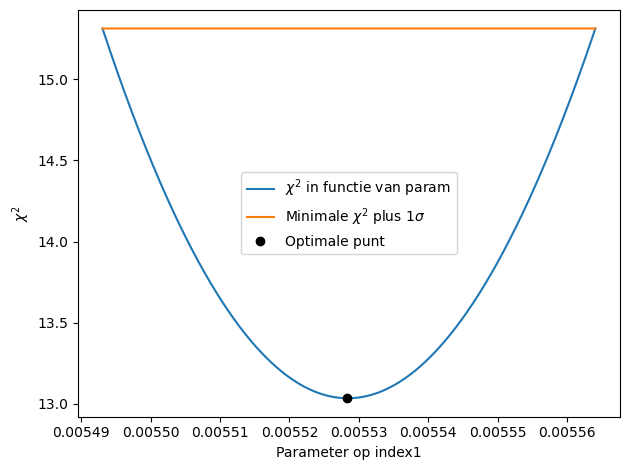

De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.67022
De gereduceerde chi^2 waarde is: 0.81467
[[8.048764970716185e-06, 5.73853028123926e-08, 'S'], [0.00552830631285997, 3.5792150493985965e-05, 'S']]


"\nfig,ax = plt.subplots(1,1, figsize = (10,10))\nax.errorbar(tijden_set_1,np.log(concentraties_set_1), linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1, color = 'black', marker = 'o')\nax.set_ylabel('ln(c) [ln(M)]',fontsize=15)\nt = np.linspace(0,350)\nax.plot(t, np.log(snelheidsmodel_1eorde(t, parameterwaarden)),label = 'Model',linestyle = '--')\nax.set_title('plot dataset 1 met model van 1e orde',fontsize = 20)\nax.set_xlabel('t [s]',fontsize = 15)\nax.legend(fontsize = 18)\nplt.tight_layout();plt.savefig('dataset_1_fit_1e_orde.png');plt.show()"

In [19]:
# eerste set metingen: 1e orde
def initial_vals(x,y):
    return [0.96e-5,1]

parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_1eorde, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1, detailed_logs=True)
k1 = sp.symbols('k1')
K1 = vector_to_datapunt(outp[1],k1)
print(outp)
#for met in outp:
#    latex_print_meting(met)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]

"""
fig,ax = plt.subplots(1,1, figsize = (10,10))
ax.errorbar(tijden_set_1,np.log(concentraties_set_1), linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1, color = 'black', marker = 'o')
ax.set_ylabel('ln(c) [ln(M)]',fontsize=15)
t = np.linspace(0,350)
ax.plot(t, np.log(snelheidsmodel_1eorde(t, parameterwaarden)),label = 'Model',linestyle = '--')
ax.set_title('plot dataset 1 met model van 1e orde',fontsize = 20)
ax.set_xlabel('t [s]',fontsize = 15)
ax.legend(fontsize = 18)
plt.tight_layout();plt.savefig('dataset_1_fit_1e_orde.png');plt.show()"""

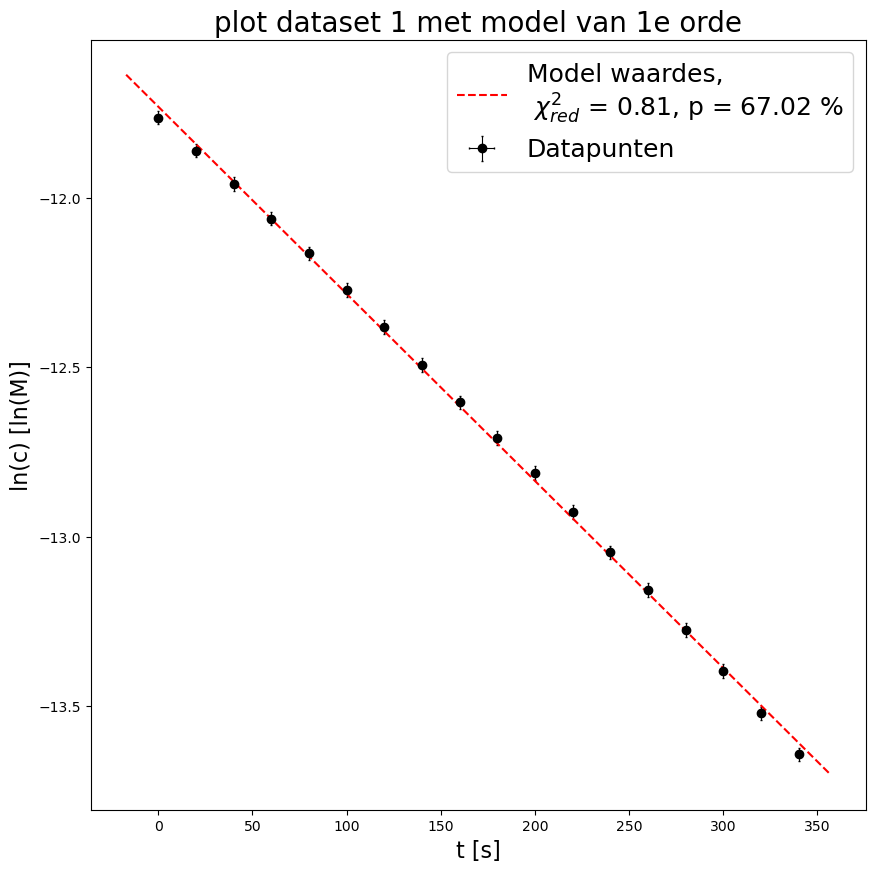

In [20]:
plot_fit(tijden_set_1, np.log(concentraties_set_1), np.full(np.shape(tijden_set_1),0), (fouten_set_1/(concentraties_set_1))**2, 't [s]', 'ln(c) [ln(M)]', 'plot dataset 1 met model van 1e orde', snelheidsmodel_1eorde_linearised,
          parameterwaarden, 0.81, 0.6702, save_name = 'dataset_1_fit_1e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)

In [21]:
#prepareer de data van de tweede set metingen
absorbanties_set_2 = []
tijd_0 = (26,16)
tijden_set_2 = []
for i in range(36): #alle meetpunten afgaan --let op! het is 0.06, niet 0.006!
    if i >= 10:
        numstring = str(i)
    else:
        numstring = '0'+str(i)
    adres = "NaOH0.03/0.03MnaOh_Absorbance__"+str(i)+'__000'+numstring+'.txt'
    file = open(adres, 'rt')
    tekst = file.read();file.close()
    tekst = tekst.split('590,095	')

    meting = float(tekst[1][:6].replace(',','.'))
    absorbanties_set_2.append(meting)
    
    datum = tekst[0].split('Mon Dec 09 11:')[1][:5]
    minuut = int(datum[:2]);seconde = int(datum[3:])

    tijdsverschil = (minuut-tijd_0[0])*60 + (seconde-tijd_0[1])
    tijden_set_2.append(tijdsverschil)

absorbanties_set_2 = np.array(absorbanties_set_2)[::2]
tijden_set_2 = np.array(tijden_set_2)[::2]
print(absorbanties_set_2)
print(tijden_set_2)

epsilon = 87000 #M^-1 cm^-1
l = 1 #cm
concentraties_set_2 = absorbanties_set_2/(epsilon*l)
tijden_set_2 = tijden_set_2

fouten_set_2  = 0.02*concentraties_set_2 

[0.9762 0.9247 0.8751 0.827  0.7809 0.7382 0.695  0.6554 0.6181 0.5816
 0.5461 0.5104 0.4771 0.4489 0.4186 0.3895 0.3612 0.3372]
[  0  20  39  59  80  99 119 139 159 179 199 219 239 260 279 299 320 339]


Raw output
       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: 23.238897516569843
             x: [ 1.072e-05  2.469e-07  2.085e-01]
           nit: 349
          nfev: 600
 final_simplex: (array([[ 1.072e-05,  2.469e-07,  2.085e-01],
                       [ 1.073e-05,  2.557e-07,  2.117e-01],
                       [ 1.071e-05,  2.481e-07,  2.093e-01],
                       [ 1.074e-05,  2.434e-07,  2.073e-01]]), array([ 2.324e+01,  2.326e+01,  2.334e+01,  2.357e+01]))
[[1.0664531317054318e-05, 1.0787938402188497e-05], [2.4397555368667066e-07, 2.4955247206008283e-07], [0.10426779334837499, 0.20954518547371812]]
c_0 heeft als waarde: 1.0724e-05 + 6.4077e-08 - 5.9331e-08 met 68% betrouwbaarheidsinterval: [1.0665e-05, 1.0788e-05] 
k heeft als waarde: 2.4686e-07 + 2.688e-09 - 2.8889e-09 met 68% betrouwbaarheidsinterval: [2.4398e-07, 2.4955e-07] 
orde heeft als waarde: 0.20854 + 0.0010096 - 0.10427 met 68% betr

C:\Users\samfa\AppData\Local\Temp\ipykernel_18800\2029746687.py:13: RuntimeWarning: invalid value encountered in power
  c = (c_0**(1-orde) - k*(1-orde)*t)**(1/(1-orde))
c:\Users\samfa\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


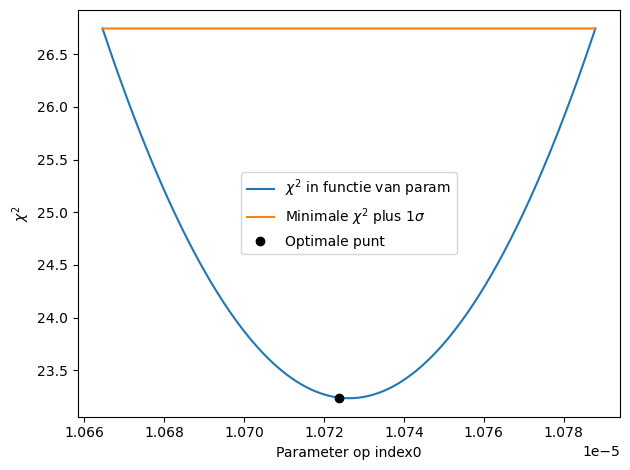

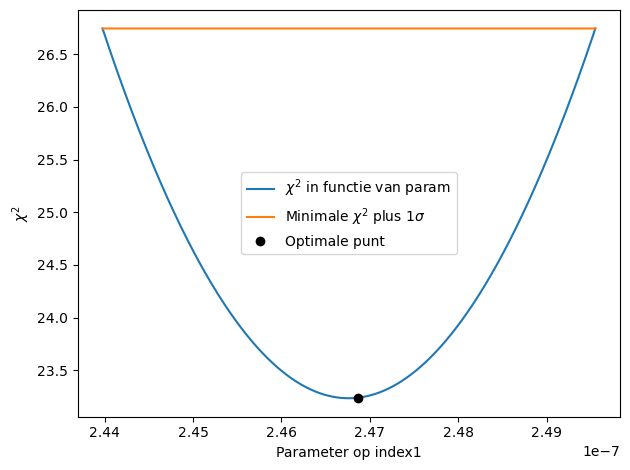

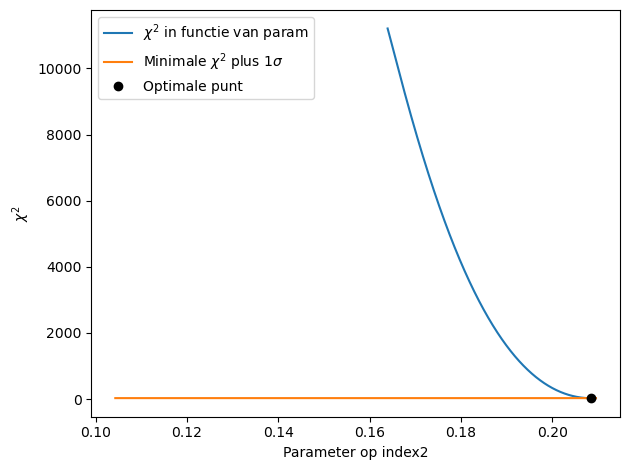

De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.079198
De gereduceerde chi^2 waarde is: 1.5493


"\nfig,ax = plt.subplots(1,3, figsize = (30,10))\nax[0].errorbar(tijden_set_2,concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 )\nax[1].errorbar(tijden_set_2,np.log(concentraties_set_2 ),linestyle = '', label = 'gemeten', yerr = fouten_set_2 /concentraties_set_2 )\nax[2].errorbar(tijden_set_2,1/concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 /(concentraties_set_2 **2))\nax[0].set_ylabel('c [M]',fontsize = 15)\nax[1].set_ylabel('ln(c) [ln(M)]',fontsize = 15)\nax[2].set_ylabel('1/c [$M^{-1}]',fontsize = 15)\nt = np.linspace(0,350)\nax[0].plot(t, snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')\nax[1].plot(t, np.log(snelheidsmodel_pseudosnelheid(t, parameterwaarden)),label = 'Model')\nax[2].plot(t, 1/snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')\nfor i in range(3):\n    ax[i].set_xlabel('t [s]',fontsize = 20)\n    ax[i].legend(fontsize = 18)\nplt.tight_layout();plt.show()"

In [22]:
# tweede set metingen: we bepalen de orde
def initial_vals(x,y):
    return [1.087e-5,2.1e-8, 0]


parameters = ['c_0', 'k', 'orde']
outp = fit(parameters, snelheidsmodel_pseudosnelheid, initial_vals, tijden_set_2, concentraties_set_2 , fouten_set_2, detailed_logs=True)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
"""
fig,ax = plt.subplots(1,3, figsize = (30,10))
ax[0].errorbar(tijden_set_2,concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 )
ax[1].errorbar(tijden_set_2,np.log(concentraties_set_2 ),linestyle = '', label = 'gemeten', yerr = fouten_set_2 /concentraties_set_2 )
ax[2].errorbar(tijden_set_2,1/concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 /(concentraties_set_2 **2))
ax[0].set_ylabel('c [M]',fontsize = 15)
ax[1].set_ylabel('ln(c) [ln(M)]',fontsize = 15)
ax[2].set_ylabel('1/c [$M^{-1}]',fontsize = 15)
t = np.linspace(0,350)
ax[0].plot(t, snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')
ax[1].plot(t, np.log(snelheidsmodel_pseudosnelheid(t, parameterwaarden)),label = 'Model')
ax[2].plot(t, 1/snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')
for i in range(3):
    ax[i].set_xlabel('t [s]',fontsize = 20)
    ax[i].legend(fontsize = 18)
plt.tight_layout();plt.show()"""

Raw output
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 46.3200594717801
             x: [ 1.053e-05  2.028e-08]
           nit: 24
          nfev: 47
 final_simplex: (array([[ 1.053e-05,  2.028e-08],
                       [ 1.053e-05,  2.027e-08],
                       [ 1.052e-05,  2.027e-08]]), array([ 4.632e+01,  4.632e+01,  4.632e+01]))
[[1.0482386311934e-05, 1.0569321629399874e-05], [2.0103986610324086e-08, 2.04508626281537e-08]]
c_0 heeft als waarde: 1.0526e-05 + 4.3482e-08 - 4.3453e-08 met 68% betrouwbaarheidsinterval: [1.0482e-05, 1.0569e-05] 
k heeft als waarde: 2.0278e-08 + 1.7312e-10 - 1.7376e-10 met 68% betrouwbaarheidsinterval: [2.0104e-08, 2.0451e-08] 


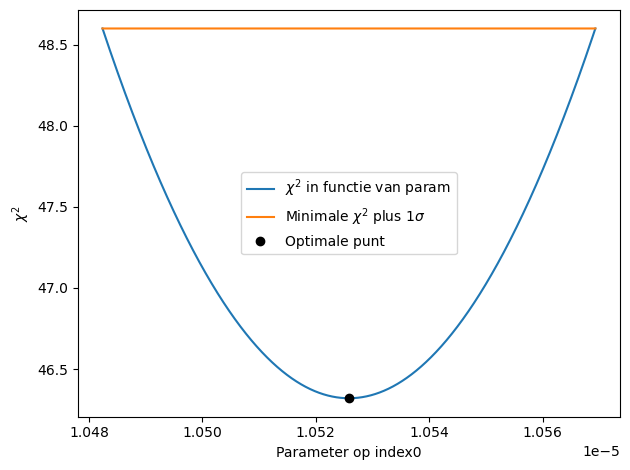

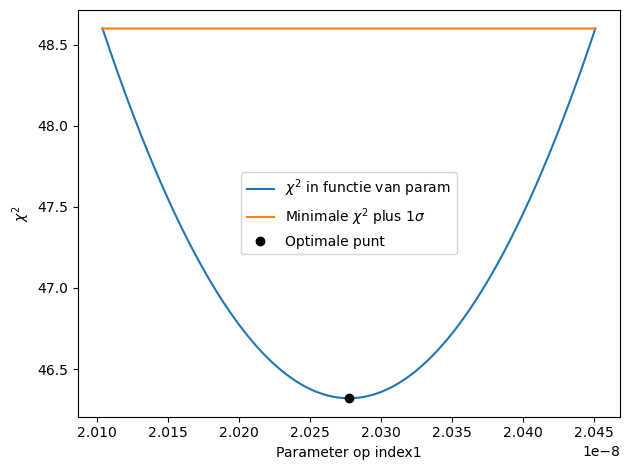

De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 8.6864e-05
De gereduceerde chi^2 waarde is: 2.895
[[1.0525839435275737e-05, 4.3482194124137e-08, 'S'], [2.027774432755432e-08, 1.7375771723023432e-10, 'S']]


$(1052.6 \pm 4.3)\cdot 10^{-8}$


$(202.8 \pm 1.7)\cdot 10^{-10}$


"\nfig,ax = plt.subplots(1,1,figsize = (10,10))\nax.errorbar(tijden_set_2,concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2,color = 'black',marker = 'o')\nax.set_ylabel('c')\nt = np.linspace(0,350)\nax.plot(t, snelheidsmodel_0eorde(t, parameterwaarden),label = 'Model',linestyle = '--')\nax.set_xlabel('t [s]',fontsize = 20)\nax.set_title('plot dataset 2 met model van 0e orde',fontsize = 20)\nax.legend(fontsize = 18)\nplt.tight_layout();plt.savefig('dataset_2_fit_0e_orde.png');plt.show()"

In [24]:
# tweede set metingen: 0e orde en 1e orde want we zien duidelijk dat het geen tweede orde is
#0e orde
def initial_vals(x,y):
    return [1.087e-5,2.1e-8]


parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_0eorde, initial_vals, tijden_set_2, concentraties_set_2 , fouten_set_2, detailed_logs=True)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
print(outp)
for met in outp:
    print('\n')
    latex_print_meting(met)
"""
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.errorbar(tijden_set_2,concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2,color = 'black',marker = 'o')
ax.set_ylabel('c')
t = np.linspace(0,350)
ax.plot(t, snelheidsmodel_0eorde(t, parameterwaarden),label = 'Model',linestyle = '--')
ax.set_xlabel('t [s]',fontsize = 20)
ax.set_title('plot dataset 2 met model van 0e orde',fontsize = 20)
ax.legend(fontsize = 18)
plt.tight_layout();plt.savefig('dataset_2_fit_0e_orde.png');plt.show()"""

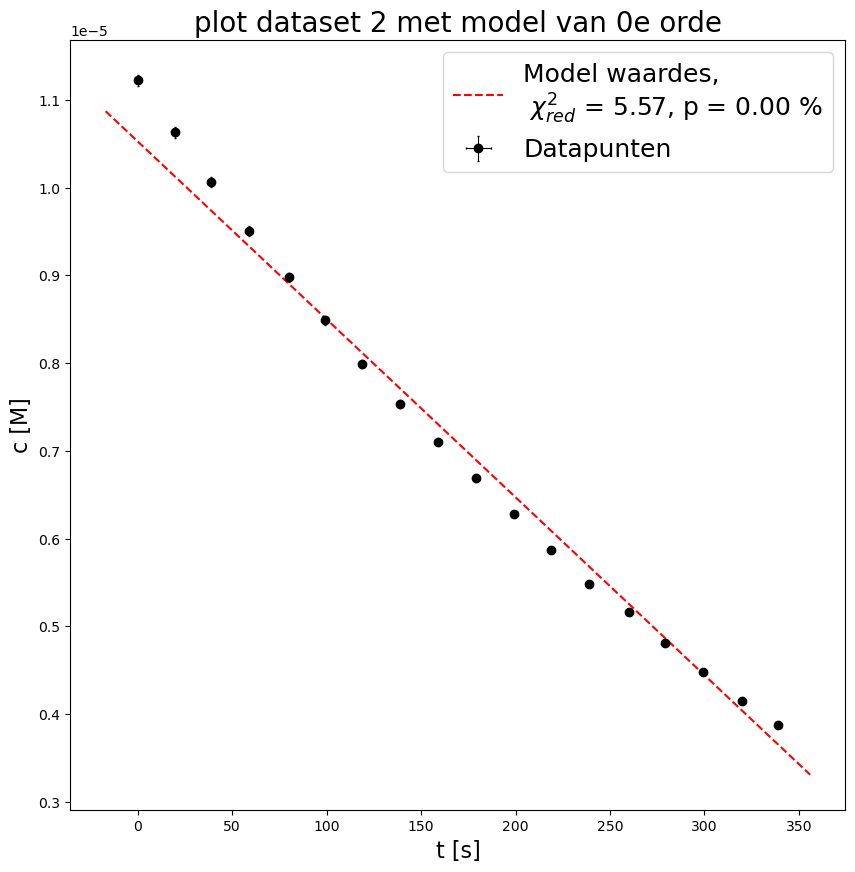

In [25]:
plot_fit(tijden_set_2, concentraties_set_2, np.full(np.shape(tijden_set_2),0), fouten_set_2**2/12, 't [s]', 'c [M]', 'plot dataset 2 met model van 0e orde', snelheidsmodel_0eorde,
          parameterwaarden, 5.57, 3.551e-12, save_name = 'dataset_2_fit_0e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)

Raw output
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 8.982668545688007
             x: [ 1.148e-05  3.119e-03]
           nit: 142
          nfev: 268
 final_simplex: (array([[ 1.148e-05,  3.119e-03],
                       [ 1.148e-05,  3.118e-03],
                       [ 1.148e-05,  3.119e-03]]), array([ 8.983e+00,  8.983e+00,  8.983e+00]))
[[1.1395694131659876e-05, 1.1559064370468381e-05], [0.0030831100655366846, 0.003154458922041166]]
c_0 heeft als waarde: 1.1477e-05 + 8.2012e-08 - 8.1358e-08 met 68% betrouwbaarheidsinterval: [1.1396e-05, 1.1559e-05] 
k heeft als waarde: 0.0031187 + 3.5788e-05 - 3.5561e-05 met 68% betrouwbaarheidsinterval: [0.0030831, 0.0031545] 


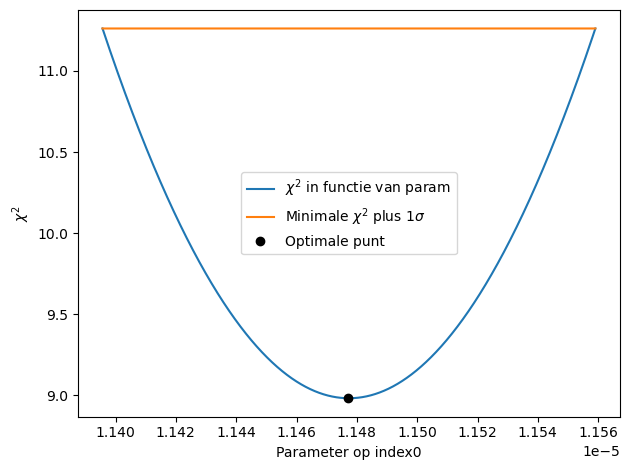

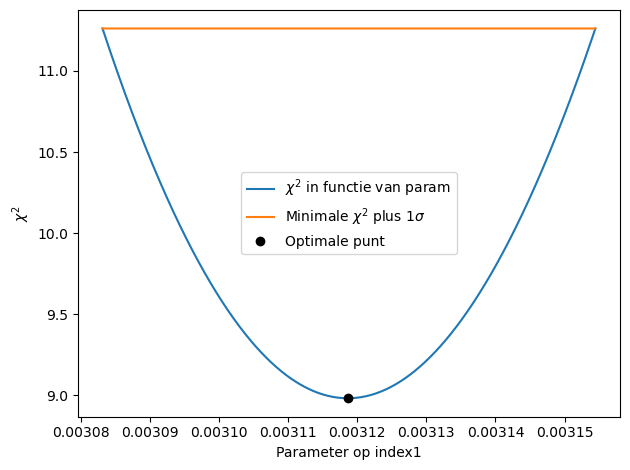

De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.91413
De gereduceerde chi^2 waarde is: 0.56142
datapunt: k2 = [0.003118670591934668, 3.578833010649783e-05, 'S']
[[1.147705207180312e-05, 8.201229866526196e-08, 'S'], [0.003118670591934668, 3.578833010649783e-05, 'S']]
$(1147.7 \pm 8.2)\cdot 10^{-8}$
$(311.9 \pm 3.6)\cdot 10^{-5}$


"\nfig,ax = plt.subplots(1,1,figsize = (10,10))\nax.errorbar(tijden_set_2,np.log(concentraties_set_2 ),linestyle = '', label = 'gemeten', yerr = fouten_set_2 /concentraties_set_2, color = 'black', marker = 'o')\nax.set_ylabel('ln(c) [ln(M)]',fontsize = 15)\nt = np.linspace(0,350)\nax.plot(t, np.log(snelheidsmodel_1eorde(t, parameterwaarden)),label = 'Model')\nax.set_title('plot dataset 2 met model van 1e orde',fontsize = 20)\nax.set_xlabel('t [s]',fontsize = 15)\nax.legend()\nplt.tight_layout();plt.savefig('dataset_2_fit_1e_orde.png');plt.show()"

In [26]:
# tweede set metingen: 1e orde
def initial_vals(x,y):
    return [1.087e-5,2.1e-8]


parameters = ['c_0', 'k']
k2 = sp.symbols('k2')
outp = fit(parameters, snelheidsmodel_1eorde, initial_vals, tijden_set_2, concentraties_set_2 , fouten_set_2, detailed_logs=True)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
K2 = vector_to_datapunt(outp[1],k2)
print(K2)
print(outp)
for met in outp:
    latex_print_meting(met)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
"""
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.errorbar(tijden_set_2,np.log(concentraties_set_2 ),linestyle = '', label = 'gemeten', yerr = fouten_set_2 /concentraties_set_2, color = 'black', marker = 'o')
ax.set_ylabel('ln(c) [ln(M)]',fontsize = 15)
t = np.linspace(0,350)
ax.plot(t, np.log(snelheidsmodel_1eorde(t, parameterwaarden)),label = 'Model')
ax.set_title('plot dataset 2 met model van 1e orde',fontsize = 20)
ax.set_xlabel('t [s]',fontsize = 15)
ax.legend()
plt.tight_layout();plt.savefig('dataset_2_fit_1e_orde.png');plt.show()"""

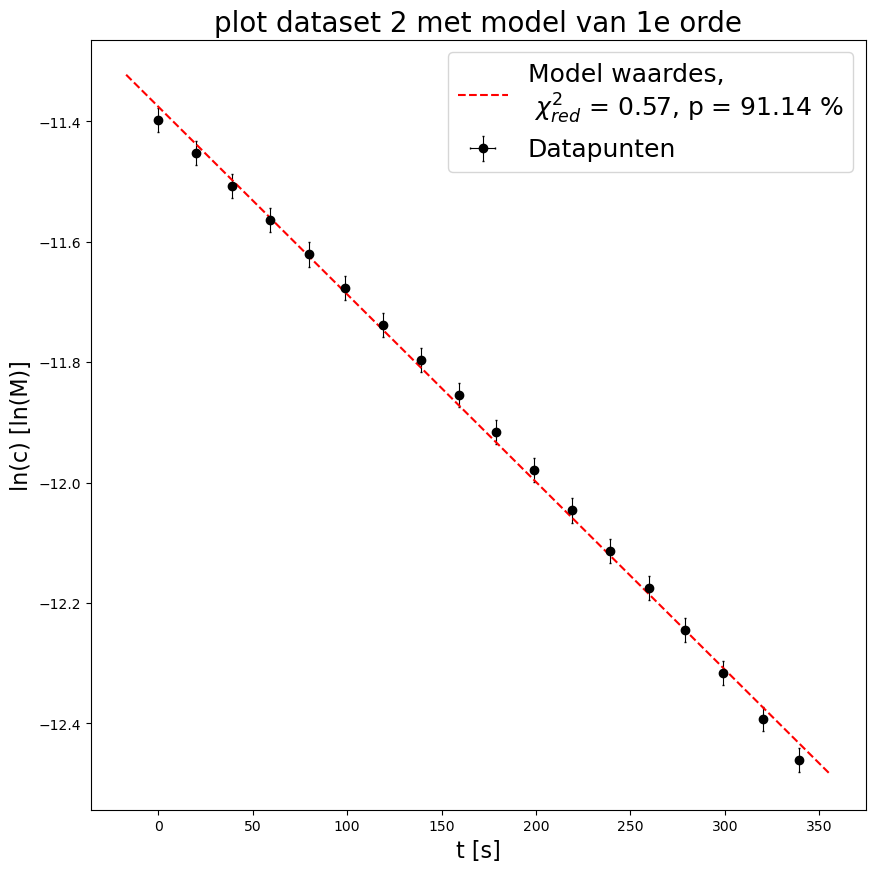

In [27]:
plot_fit(tijden_set_2, np.log(concentraties_set_2), np.full(np.shape(tijden_set_2),0), (fouten_set_2/(concentraties_set_2))**2, 't [s]', 'ln(c) [ln(M)]', 'plot dataset 2 met model van 1e orde', snelheidsmodel_1eorde_linearised,
          parameterwaarden, 0.57,0.9114, save_name = 'dataset_2_fit_1e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)

Raw output
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 160.09579944466742
             x: [ 1.228e-05  4.372e+02]
           nit: 104
          nfev: 194
 final_simplex: (array([[ 1.228e-05,  4.372e+02],
                       [ 1.228e-05,  4.372e+02],
                       [ 1.228e-05,  4.372e+02]]), array([ 1.601e+02,  1.601e+02,  1.601e+02]))
[[1.2133463794836851e-05, 1.2419030234807107e-05], [430.6254624731178, 443.8532989863407]]
c_0 heeft als waarde: 1.2276e-05 + 1.4325e-07 - 1.4231e-07 met 68% betrouwbaarheidsinterval: [1.2133e-05, 1.2419e-05] 
k heeft als waarde: 437.18 + 6.6687 - 6.5591 met 68% betrouwbaarheidsinterval: [430.63, 443.85] 


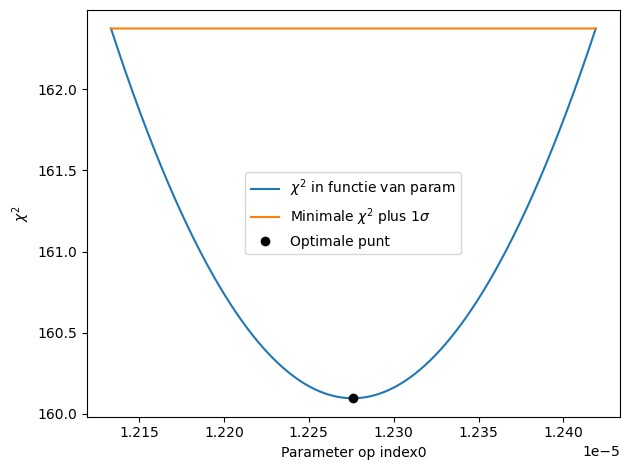

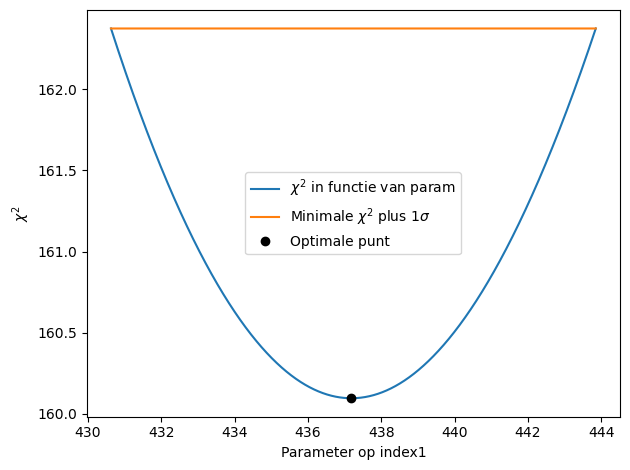

De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 7.8677e-26
De gereduceerde chi^2 waarde is: 10.006
[1.2275775715607414e-05, 1.4325451919969378e-07, 'S']


$(122.8 \pm 1.4)\cdot 10^{-7}$
[437.18454955223194, 6.668749434108747, 'S']


$(437.2 \pm 6.7)\cdot 10^{0}$


"\nfig,ax = plt.subplots(1,1, figsize = (10,10))\nax.errorbar(tijden_set_2,1/concentraties_set_2,linestyle = '', label = 'gemeten', yerr = fouten_set_2/(concentraties_set_2**2), color = 'black', marker = 'o')\nax.set_ylabel('1/c [M$^{-1}$]',fontsize = 15)\nt = np.linspace(0,350)\nax.plot(t, 1/snelheidsmodel_2eorde(t, parameterwaarden),linestyle = '--',label = 'Model')\nax.set_title('plot dataset 2 met model van 2e orde',fontsize = 20)\nax.set_xlabel('t [s]',fontsize = 15)\nax.legend(fontsize = 18)\nplt.tight_layout();plt.savefig('dataset_2_fit_2e_orde.png');plt.show()"

In [29]:
# tweede set metingen 2e orde
def initial_vals(x,y):
    return [0.96e-5,1]


parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_2eorde, initial_vals, tijden_set_2, concentraties_set_2, fouten_set_2, detailed_logs=True)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
for met in outp:
    print(met)
    print('\n')
    latex_print_meting(met)
"""
fig,ax = plt.subplots(1,1, figsize = (10,10))
ax.errorbar(tijden_set_2,1/concentraties_set_2,linestyle = '', label = 'gemeten', yerr = fouten_set_2/(concentraties_set_2**2), color = 'black', marker = 'o')
ax.set_ylabel('1/c [M$^{-1}$]',fontsize = 15)
t = np.linspace(0,350)
ax.plot(t, 1/snelheidsmodel_2eorde(t, parameterwaarden),linestyle = '--',label = 'Model')
ax.set_title('plot dataset 2 met model van 2e orde',fontsize = 20)
ax.set_xlabel('t [s]',fontsize = 15)
ax.legend(fontsize = 18)
plt.tight_layout();plt.savefig('dataset_2_fit_2e_orde.png');plt.show()"""

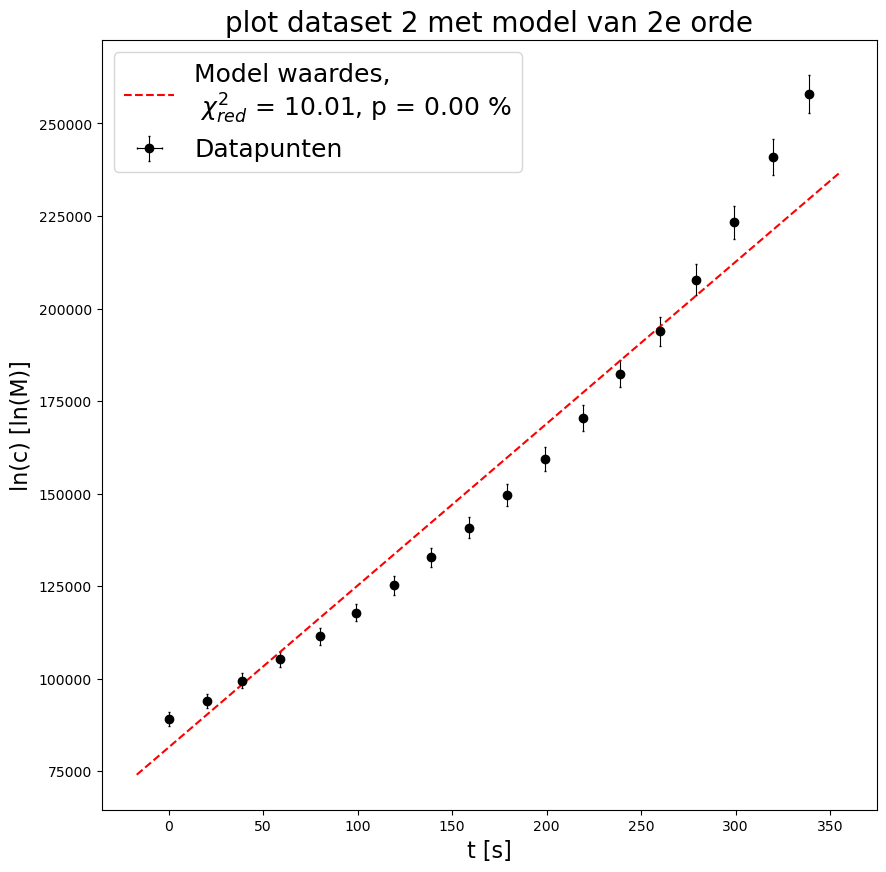

In [30]:
plot_fit(tijden_set_2, 1/concentraties_set_2, np.full(np.shape(tijden_set_2),0), (fouten_set_2/(concentraties_set_2**2))**2, 't [s]', 'ln(c) [ln(M)]', 'plot dataset 2 met model van 2e orde', snelheidsmodel_2eorde_linearised,
          parameterwaarden, 10.007, 7.824e-26, save_name = 'dataset_2_fit_2e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)

In [31]:
#bepaling van de orde van NaOH


#concentraties NaOH: hou rekening met de verdunningen!
VNaOH,Vkv, c1, c2, vbegin= sp.symbols('V_{NaOH} V_{KV} c1 c2 vbegin')
NaOHstock1 = 0.060 #molair
NaOHstock2 = 0.030 #molair
NaOHV = vector_to_datapunt([2.0e-3, 2.0e-3*0.005, 'U'], VNaOH)  ###dispensette, fout is 0.5% want veel fabrikanten hebben die fout
aanlengV = vector_to_datapunt([1.0e-3, 0.007*1.0e-3, 'U'],Vkv) #die ene paper uit Iran zei dat de fout 0.7% was

concentratie1 = vergelijking(NaOHstock1*VNaOH/(VNaOH+Vkv), [VNaOH, Vkv])
concentratie2 = vergelijking(NaOHstock2*VNaOH/(VNaOH+Vkv), [VNaOH, Vkv])

C1 = data_analyse(concentratie1, [NaOHV, aanlengV], c1)
C2 = data_analyse(concentratie2, [NaOHV, aanlengV], c2)
latex_print_meting(C1)
latex_print_meting(C2)

###waarden uit de vorige metingen: ###aanpassen zodra de orde gefixt is
parameters = (k1, k2)
print(K1)
latex_print_meting(K1)
latex_print_meting(K2)
assert type(k1) == sp.Symbol
#berekeningen:
orde = sp.symbols('n')
n = vergelijking(sp.log(k1/k2)/sp.log(c1/c2), parameters = [k1, k2, c1, c1])
#help(data_analyse)
orde_NaOH = data_analyse(n, [K1, K2, C1, C2], orde)
_ = latex_print_meting(orde_NaOH, 'n_{NaOH}')
#ja lol da's dus duidelijk niet waar

$c1 = (4000.00000000000 \pm 6.6)\cdot 10^{-5}$
$c2 = (2000.00000000000 \pm 3.3)\cdot 10^{-5}$
datapunt: k1 = [0.00552830631285997, 3.5792150493985965e-05, 'S']
$k1 = (552.8 \pm 3.6)\cdot 10^{-5}$
$k2 = (311.9 \pm 3.6)\cdot 10^{-5}$
$n = (82.6 \pm 1.9)\cdot 10^{-2}$


In [32]:
#bepaal de halfwaardetijden
t12_1 = vergelijking(sp.log(2)/k1, [k1])
t12_2 = vergelijking(sp.log(2)/k2, [k2])
T12_1, T12_2 = sp.symbols('T12_1 T12_1')
halfwaardetijd1 = data_analyse(t12_1, [K1], T12_1)
halfwaardetijd2 = data_analyse(t12_2, [K2], T12_2)
latex_print_meting(halfwaardetijd1)
latex_print_meting(halfwaardetijd2)

$T12_1 = (1253.8 \pm 8.1)\cdot 10^{-1}$
$T12_1 = (222.3 \pm 2.6)\cdot 10^{0}$


'$T12_1 = (222.3 \\pm 2.6)\\cdot 10^{0}$'